In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_excel('cust_data.xlsx')
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [48]:
data.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [49]:
# Assuming 'df' is your DataFrame
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [50]:
data.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

## Exploratory Data Analysis

In [51]:
v1 = data['Gender'].value_counts()
v1

F    24778
M     5222
Name: Gender, dtype: int64

In [52]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


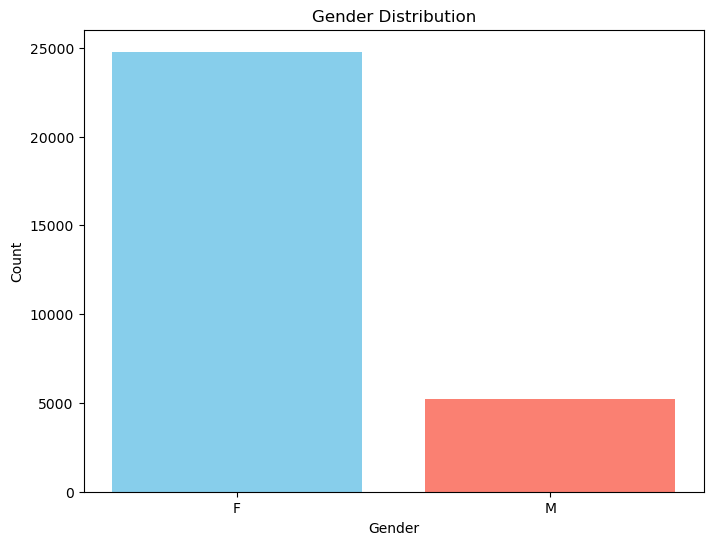

In [53]:
# Bar Chart for Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


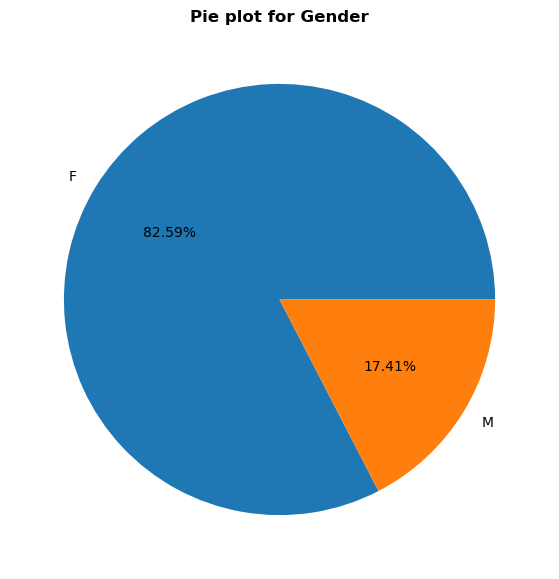

In [54]:
label = v1.index

#pie plot for gender
plt.figure(figsize=(12,7))
plt.pie(v1, labels=label, autopct='%.2f%%')
plt.title('Pie plot for Gender',fontweight='bold',size=12)
plt.show()

#### Observations

*There are more female customers (83%) compared to the male customers (17%).*

* So we can observed that more number of females order than males

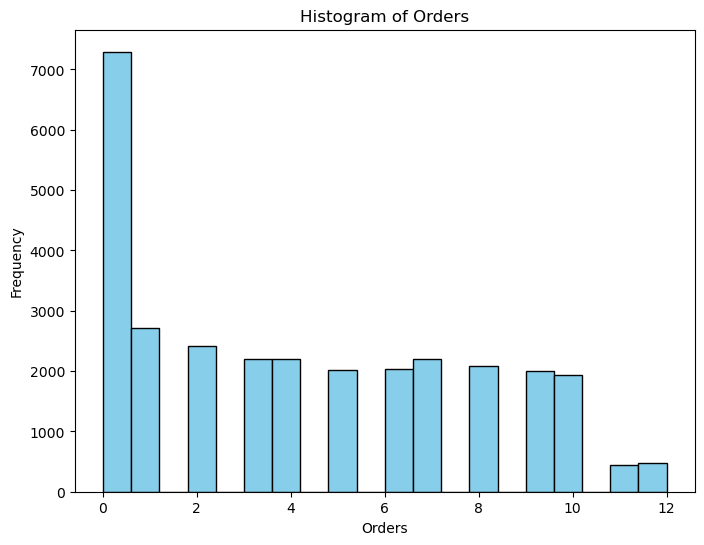

In [55]:
# Histogram for Orders
plt.figure(figsize=(8, 6))
plt.hist(data['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.title('Histogram of Orders')
plt.show()


#### The majority of customers tend to place orders for a single item, while a smaller portion of customers have ordered in quantities ranging from 11 to 12 item

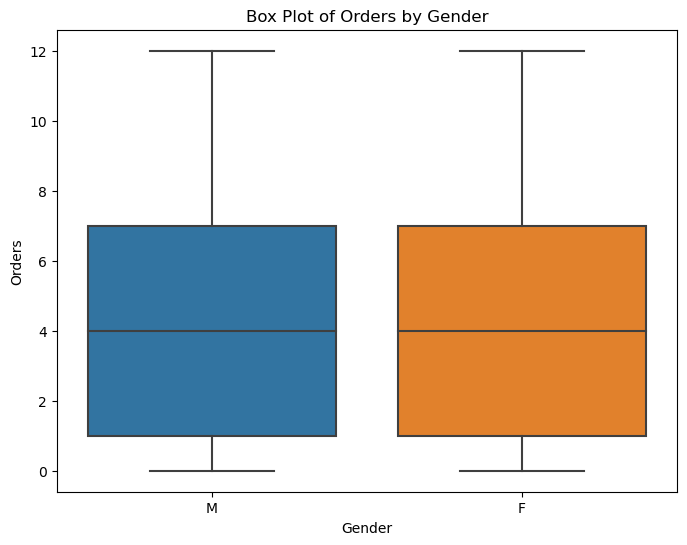

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Orders', data=data)
plt.title('Box Plot of Orders by Gender')
plt.show()


#### Both males and females exhibit similar purchasing behavior, with both genders typically buying similar quantities of items.

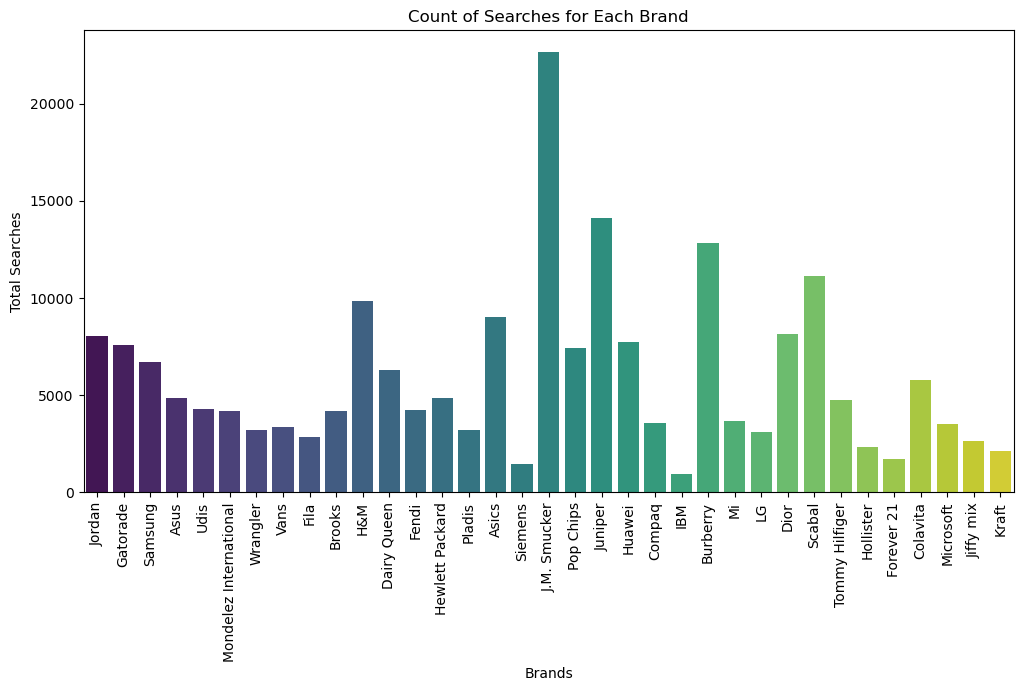

In [60]:
brand_counts = data.iloc[:, 3:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Total Searches')
plt.title('Count of Searches for Each Brand')
plt.show()


#### The brand "J.M Smucker" garners the highest number of searches or ordered, whereas "IBM" receives relatively fewer searches.

### Model Building

In [61]:
from sklearn.cluster import KMeans

X = data.iloc[:, 2:] 

In [62]:

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=200, random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

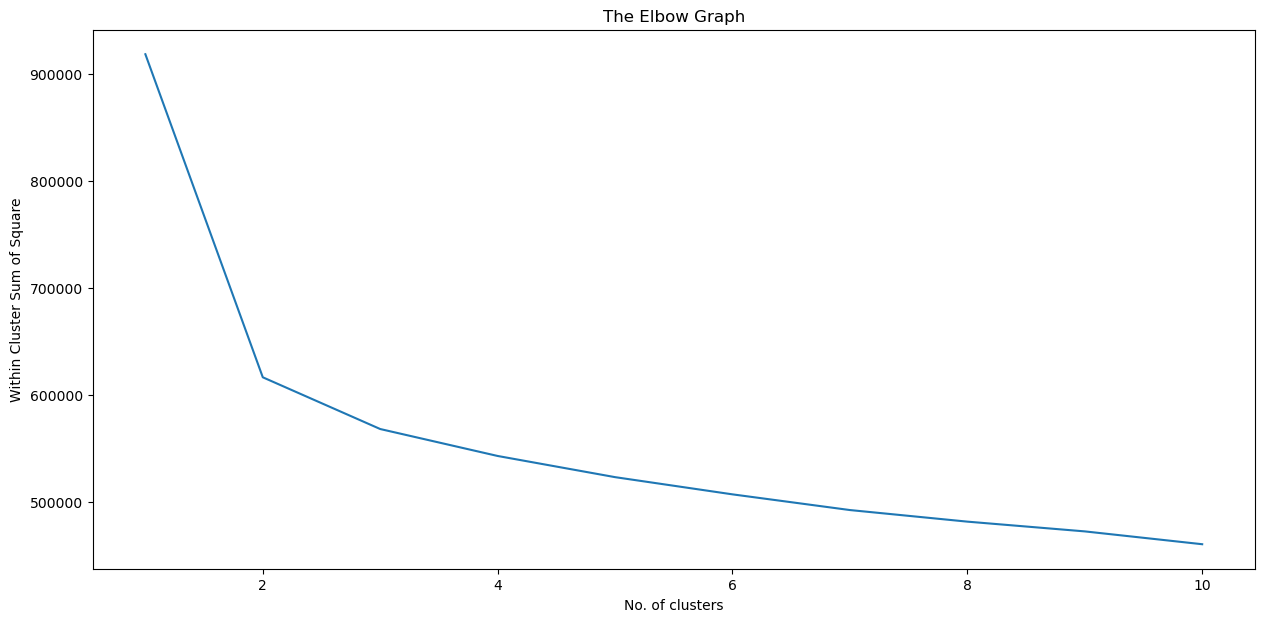

In [63]:
plt.figure(figsize = (15, 7))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
for i in range(2,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(X)
 
 score = silhouette_score(X, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {i} --> Silhouetter Score: %.3f' % score)

for cluster: 2 --> Silhouetter Score: 0.338
for cluster: 3 --> Silhouetter Score: 0.203
for cluster: 4 --> Silhouetter Score: 0.202
for cluster: 5 --> Silhouetter Score: 0.219
for cluster: 6 --> Silhouetter Score: 0.132
for cluster: 7 --> Silhouetter Score: 0.133
for cluster: 8 --> Silhouetter Score: 0.133
for cluster: 9 --> Silhouetter Score: 0.134
for cluster: 10 --> Silhouetter Score: 0.097


***We should consider the K=2 based on the Elbow Curve and Silhouttee Score.***

In [66]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, random_state = 42)

In [67]:
kmeans

KMeans(max_iter=200, n_clusters=2, random_state=42)

In [70]:
data['Cluster'] = kmeans.fit_predict(X)

In [72]:
cluster_stats = data.groupby('Cluster').describe()
cluster_stats

Cust_ID                                                            \
           count          mean          std  min     25%      50%      75%   
Cluster                                                                      
0        16823.0  14808.684658  8663.123776  2.0  7259.0  14707.0  22347.5   
1        13177.0  15245.389542  8651.067073  1.0  7854.0  15328.0  22695.0   

                   Orders            ... Jiffy mix         Kraft            \
             max    count      mean  ...       75%  max    count      mean   
Cluster                              ...                                     
0        30000.0  16823.0  1.362718  ...       0.0  8.0  16823.0  0.073590   
1        29993.0  13177.0  7.753586  ...       0.0  8.0  13177.0  0.067466   

                                             
              std  min  25%  50%  75%   max  
Cluster                                      
0        0.380766  0.0  0.0  0.0  0.0   6.0  
1        0.396844  0.0  0.0  0.0  0.0  16.0  

[2 rows x 296 columns]

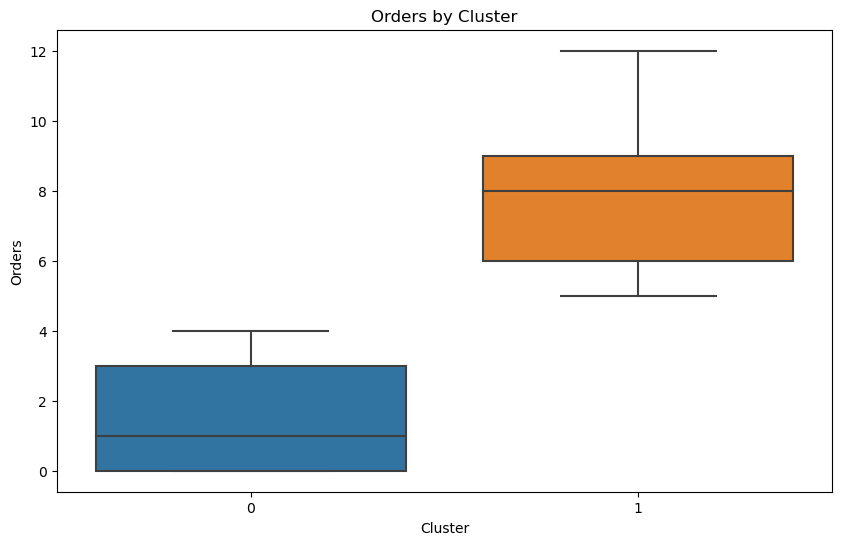

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Orders', data=data)
plt.title('Orders by Cluster')
plt.show()

#### The dataset reveals a clear segmentation into two customer groups: one characterized by smaller order quantities and another characterized by significantly larger order quantities. 

In [77]:
cluster_profiles = data.groupby('Cluster')[['Orders', 'J.M. Smucker']].mean()

In [78]:
cluster_profiles

,Orders,J.M. Smucker
Cluster,,
0,1.362718,0.726149
1,7.753586,0.791379



#### Certainly! It appears that one group of customers tends to order a single quantity of products from J.M. Smucker, while the other group, distinct in their ordering behavior, places orders from J.M. Smucker a total of seven times.

In [80]:

cluster_labels = {0: 'Low-Volume Shoppers', 1: 'High-Volume Shoppers'}

data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

print(data[['Cust_ID', 'Cluster', 'Cluster_Label']].head())


   Cust_ID  Cluster         Cluster_Label
0        1        1  High-Volume Shoppers
1        2        0   Low-Volume Shoppers
2        3        1  High-Volume Shoppers
3        4        0   Low-Volume Shoppers
4        5        1  High-Volume Shoppers


## Model Interpretation

The segmentation model has successfully identified two distinct customer segments:

* <b>Low-Volume Shoppers</b>:
    - This group consists of customers who tend to place smaller orders. Across all 35 brands, they typically order a modest           quantity of products.
    
    
    
* <b>High-Volume Shoppers</b>:
   - In contrast, this group represents customers who exhibit a different ordering behavior. They consistently place larger          orders, demonstrating a preference for purchasing in higher quantities from all 35 brands.